# Example of Metadata Tracking with OpenCGA
OpenCGA has many components, one of the most important for this project being OpenCGA Catalog. This component allows users to create a metadata database to track users, projects, studies, files, samples, families, and jobs. We will interact with this database using the Python client library `PyOpenCGA` to access the REST API included in OpenCGA. You can refer to the documentation [here](http://docs.opencb.org/display/opencga/Python) to learn more about PyOpenCGA. 

This notebook will act as an example for how to use OpenCGA to track metadata in the Silent Genomes Project. More specifically, we will include examples showing how to use `PyOpenCGA` with the OpenCGA instance created on the BCCHR server.

The following links can provide further reference for describing OpenCGA and how to use it:
* [Overview of Data Management](http://docs.opencb.org/display/opencga/Data+Management) including definitions of the major entities involved in OpenCGA Catalog

# Imports
The following cell imports the libraries needed to run code within this notebook

In [1]:
# Import libraries needed to run the script
import os
import result
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from pprint import pprint

from pyopencga.opencga_config import ClientConfiguration
from pyopencga.opencga_client import OpenCGAClient

# Configure and Connect
Before using OpenCGA, the client needs to be configured and connected to. Information relating to the OpenCGA host, username and password are considered to be sensitive information and should not be openly shared. For this reason, they are stored as environment variables in a `.env` file located in the base directory of this project. 

In order to read the information from this file into your environment, before running this notebook you need to activate your environment and load the variables with the following command:
```
source venv/bin/activate
source .env
```

This should load the variables `OPENCGA_HOST`, `OPENCGA_USERNAME`, and `OPENCGA_PASSWORD` into your environment so you can successfully connect to the client.

In [2]:
# Configure the OpenCGA client
config = ClientConfiguration({
        "rest": {
                "host": os.environ.get("OPENCGA_HOST")
        }
})
oc = OpenCGAClient(config)

# Authenticate the user
user = os.environ.get("OPENCGA_USERNAME")
passwd = os.environ.get("OPENCGA_PASSWORD")
oc.login(user, passwd)

# Setup OpenCGA Clients
users = oc.users
projects = oc.projects
studies = oc.studies
files = oc.files
jobs = oc.jobs
families = oc.families
individuals = oc.individuals
samples = oc.samples
cohorts = oc.cohorts
panels = oc.panels

# Querying the Metadata Database
The following section outlines a number of queries that can be performed using OpenCGA. Information in this database is organized into the following major entities:
1. **_Users_**: a person who will be using OpenCGA -- every user should be authenticated and some can perform specific actions
2. **_Groups_**: you can create a group of users to simplify data permission management. These are defined at the study level (i.e. each study contains different groups) and can only be created by the study owner
3. **_Projects_**: a piece of planned work or an activity that is finished over a period of time and is intended to achieve a particular purpose. Any user with full permissions can create any number of projects and studies. Projects need to contain at minimum, a name, an alias (project identifier), and the species organism
4. **_Studies_**: projects are componsed by a set of studies. A study is the activity of examining a subject in detail in order to discover new information. Aside from Users and Projects, most of the data models in Catalog belong to a particular study
5. **_Variable Sets_**: a set of Variables (the complete definition of fields that need to be populated). Every Study can have as many different Variable Set definitions as necessary
6. **_Annotation Sets_**: the values defined for each of the Variables are called Annotations, and the population of a whole Variable Set is called an Annotation Set. An Annotation Set is always related to one concrete Variable Set
7. **_Files_**: every File registry contains the physical path where the files/folders are stored in the file system (i.e. the uri). Catalog also creates a virtual file structure so no matter what the real location of the files are, users can organize and work with those files differently
8. **_Individuals and Families_**: an Individual is a subject (typically a person) for which some analysis will be made. A group of Individuals with any parental or blood relationship is called a Family
9. **_Samples and Cohorts_**: a Sample is any biological material, normally extracted from an Individual. Cohorts contain groups of samples sharing some particular conditions such as "healthy" vs "infected"
10. **_Clinical Analysis_**: contains all the information of the Individuals and Samples involved to perform a real clinical analysis
11. **_Job_**: every time the user calls to an analysis webservice to run anything, a new Job is created. This job contains the essential information about the task that needs to be run. OpenCGA supports SGE

The above entities are related in the following way:
![OpenCGA Data Model](http://docs.opencb.org/download/attachments/327907/catalog_data_models_v13.png?version=1&modificationDate=1560245879990&api=v2)


For more information regarding API endpoints for the OpenCGA server hosted by BCCHR, you can refer to the Swagger by navigating to the host URL appended with `/webservices` in a web browser. 

If you need more information about an object or method, you can use the `help()` command as shown below:

In [3]:
help(oc.samples)

Help on Samples in module pyopencga.rest_clients.sample_client object:

class Samples(pyopencga.rest_clients._parent_rest_clients._ParentBasicCRUDClient, pyopencga.rest_clients._parent_rest_clients._ParentAclRestClient, pyopencga.rest_clients._parent_rest_clients._ParentAnnotationSetRestClient)
 |  Samples(configuration, session_id=None, login_handler=None, *args, **kwargs)
 |  
 |  This class contains method for Samples webservice
 |  
 |  Method resolution order:
 |      Samples
 |      pyopencga.rest_clients._parent_rest_clients._ParentBasicCRUDClient
 |      pyopencga.rest_clients._parent_rest_clients._ParentAclRestClient
 |      pyopencga.rest_clients._parent_rest_clients._ParentAnnotationSetRestClient
 |      pyopencga.rest_clients._parent_rest_clients._ParentRestClient
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, configuration, session_id=None, login_handler=None, *args, **kwargs)
 |      :param login_handler: a parameterless method that can log

### Querying for Samples
Samples are organized according to studies. In the below example we use the 1000 Genomes Phase 3 as the study, but as new data arrives to be analyzed, we will create out own study.

In [4]:
samples.search(study='1kG_phase3').num_results()

1000

In [5]:
sample_results = samples.search(study='1kG_phase3', limit=2)

for res in sample_results.results():
    pprint(res)

{'annotationSets': [],
 'attributes': {'OPENCGA_INDIVIDUAL': {'affectationStatus': 'UNKNOWN',
                                       'attributes': {},
                                       'creationDate': '20210901022141',
                                       'disorders': [],
                                       'ethnicity': 'AFR',
                                       'father': {'parentalConsanguinity': False,
                                                  'release': 0,
                                                  'version': 0},
                                       'id': 'HG00096',
                                       'karyotypicSex': 'XY',
                                       'lifeStatus': 'ALIVE',
                                       'location': {},
                                       'modificationDate': '20210904233501',
                                       'mother': {'parentalConsanguinity': False,
                                                  'relea

We can also extract only specific fields from the results, as shown below:

In [6]:
[res['id'] for res in sample_results.results()]

['HG00096', 'HG00097']

We can also use a single query to search multiple samples at once:

In [7]:
res = samples.info(query_id = "A,B,C",study="1kG_phase3")
for sample in res.results():
    pprint(sample)

{'annotationSets': [{'annotations': {'amount': '1 g',
                                     'date_processed_by_gsc': '07/06/2021',
                                     'fastqc_download_status': 'Downloaded',
                                     'sample_batch': '1',
                                     'sample_id': 'A'},
                     'attributes': {},
                     'creationDate': '20220310224656',
                     'id': 'demo1',
                     'name': 'demo1',
                     'release': 1,
                     'variableSetId': 'samples_metadata'}],
 'attributes': {},
 'creationDate': '20211006224028',
 'description': '',
 'id': 'A',
 'individual': {'parentalConsanguinity': False, 'release': 0, 'version': 0},
 'modificationDate': '20220310224513',
 'name': 'A',
 'phenotypes': [],
 'release': 1,
 'somatic': False,
 'source': '',
 'stats': {},
 'status': {'date': '20211006224028', 'message': '', 'name': 'READY'},
 'type': '',
 'uuid': 'V8PlhQF8AAQAAesh7nKstg',

### VariableSet Annotations
We can also add custom annotations to individuals, samples, cohorts, etc. through the use of `Variable Set`. As described earlier, a Variable Set is the set of all variables that need to be populated, similar to a SQL table with each column needing to be populated. 

You can add annotations during creation of an object, or after the fact using the `update` method. 

We have created a variable set called `samples_metadata` to add custom annotations to any sample. You can update it as shown below:

In [8]:
samples.update(
    query_id="A",
    data={
        "name": "A",
        "annotationSets": [
            {
                "id": "demo1", 
                "variableSetId": "samples_metadata",
                "annotations": {
                    "sample_id": "A",
                    "sample_batch": "1",
                    #"volume": "52",
                    "amount": "1 g",
                    "fastqc_download_status": "Downloaded",
                    "date_processed_by_gsc": "07/06/2021"
                }
            }
        ]
    },
    annotationSetsAction="SET"
)

### Making Use of the Pandas Library with OpenCGA
We can use the `Pandas` library in Python to help visualize the resulting queries. By default, the resulting data is typically displayed as a Python dictionary, which can be difficult to read when viewing hundreds of samples. To make things easier to visualize, we can store that information in a Data Frame, which organizes the data into a table. 

First, we will need to define a function to get the sample data:

In [9]:
def get_sample_details(res):
    try:
        ann = res["annotationSets"][0]["annotations"]
        return result.Ok(ann)
    except KeyError:
        return result.Err("Not found")

In [10]:
data = [get_sample_details(r).unwrap_or("NA") for r in res.results()]
df = pd.DataFrame(data)
df.head()

,date_processed_by_gsc,amount,fastqc_download_status,sample_id,sample_batch,volume,date_received_by_gsc,sample_provenance,qc_by_gsc_result,date_qced_by_gsc,date_shipment_gsc,sample_tissue,concentration,quantification_method
0,07/06/2021,1 g,Downloaded,A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.5,NaN,B,1,25,25/10/2021,GSC,PASS,2021-12-08,2021-11-09,blood,0.001,Illumina
2,NaN,0.52,NaN,C,1,24,25/10/2021,Alliance,PASS,2021-11-10,2021-11-09,blood,0.001,Illumina


Pandas also lets you inspect the data and perform some visualization after performing some preprocessing:

In [11]:
df.date_processed_by_gsc = pd.to_datetime(df.date_received_by_gsc)
df.volume = pd.to_numeric(df.volume)
df.head()

,date_processed_by_gsc,amount,fastqc_download_status,sample_id,sample_batch,volume,date_received_by_gsc,sample_provenance,qc_by_gsc_result,date_qced_by_gsc,date_shipment_gsc,sample_tissue,concentration,quantification_method
0,NaT,1 g,Downloaded,A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-25,0.5,NaN,B,1,25.0,25/10/2021,GSC,PASS,2021-12-08,2021-11-09,blood,0.001,Illumina
2,2021-10-25,0.52,NaN,C,1,24.0,25/10/2021,Alliance,PASS,2021-11-10,2021-11-09,blood,0.001,Illumina


Below is an example of the visualization

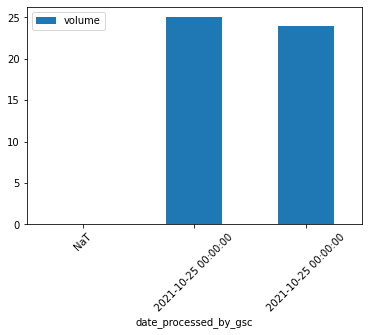

In [12]:
df.plot("date_processed_by_gsc","volume",kind="bar")
plt.xticks(rotation=45);

### Bulk Import of Sample Data from an Excel Sheet
So far we have seen how to import a single sample; however, it would be more convenient to import multiple samples at once. We can do this by reading a standard Excel sheet.
![example sheet](excel.png)

In [13]:
sheet = pd.read_excel("samples metadata.xlsx", sheet_name="data")
sheet

,sample_id,sample_batch,sample_tissue,sample_provenance,volume,concentration,amount,quantification_method,date_shipment_gsc,date_received_by_gsc,date_qced_by_gsc,qc_by_gsc_result
0,A,1,blood,GSC,25,0.001,0.44,Illumina,2021-11-09,25/10/2021,2021-07-07,PASS
1,B,1,blood,GSC,25,0.001,0.50,Illumina,2021-11-09,25/10/2021,2021-12-08,PASS
2,C,1,blood,Alliance,24,0.001,0.52,Illumina,2021-11-09,25/10/2021,2021-11-10,PASS
3,D,1,blood,Alliance,23,0.001,0.39,Illumina,2021-11-09,25/10/2021,2021-12-10,PASS


We can preprocess the data from the Excel sheet, such as updating datatypes to be `string`:

In [14]:
for col in sheet.columns:
    sheet[col] = sheet[col].astype('string')

The data can then be loaded into OpenCGA using a simple loop:

In [15]:
for i in range(sheet.shape[0]):
    samples.update(query_id=sheet.sample_id[i],data={"name":sheet.sample_id[i],"annotationSets":
                                 [{"id":"demo2","variableSetId":"sample_metadata",
                                   "annotations":{"sample_id":sheet.sample_id[i],
                                                  "sample_batch":sheet.sample_batch[i],
                                                  "sample_tissue":sheet.sample_tissue[i],
                                                  "sample_provenance":sheet.sample_provenance[i],
                                                  "volume":sheet.volume[i],
                                                  "concentration":sheet.concentration[i],
                                                  "amount":sheet.amount[i],
                                                  "quantification_method":sheet.quantification_method[i],
                                                  "date_shipment_gsc":sheet.date_shipment_gsc[i],
                                                  "date_received_by_gsc":sheet.date_received_by_gsc[i],
                                                  "date_qced_by_gsc":sheet.date_qced_by_gsc[i],
                                                  "qc_by_gsc_result":sheet.qc_by_gsc_result[i]
                                                  }}]},
               annotationSetsAction="SET")

In [16]:
res = samples.info(query_id = "A,B,C,D",study="1kG_phase3")
ds = [get_sample_details(r).unwrap_or('NA') for r in res.results()]
df = pd.DataFrame(ds)
df.head()

,date_received_by_gsc,volume,amount,sample_provenance,qc_by_gsc_result,date_qced_by_gsc,sample_id,date_shipment_gsc,sample_tissue,concentration,sample_batch,quantification_method
0,25/10/2021,25,0.44,GSC,PASS,2021-07-07,A,2021-11-09,blood,0.001,1,Illumina
1,25/10/2021,25,0.5,GSC,PASS,2021-12-08,B,2021-11-09,blood,0.001,1,Illumina
2,25/10/2021,24,0.52,Alliance,PASS,2021-11-10,C,2021-11-09,blood,0.001,1,Illumina
3,25/10/2021,23,0.39,Alliance,PASS,2021-12-10,D,2021-11-09,blood,0.001,1,Illumina
